In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [13]:
image_dir='Destruction_data'
data_dir='Destruction_data'
image_exts=['jpeg','jpg','bmp','png']

In [14]:
dataset = (os.listdir('Destruction_data'))

In [15]:
gpuss = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
for gpu in gpuss:
    tf.config.experimental.set_memory_growth(gpu, True)

In [16]:
gpuss

[]

In [17]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

img_100026.jpg
img_10003.jpg
img_100050.jpg
img_100074.jpg
img_10012.jpg
img_100145.jpg
img_100191.jpg
img_100257.jpg
img_100312.jpg
img_100337.jpg
img_100456.jpg
img_1005.jpg
img_10053.jpg
img_100542.jpg
img_100598.jpg
img_100605.jpg
img_100656.jpg
img_100665.jpg
img_100796.jpg
img_100824.jpg
img_100828.jpg
img_10092.jpg
img_100922.jpg
img_101015.jpg
img_101032.jpg
img_101091.jpg
img_101113.jpg
img_101159.jpg
img_101175.jpg
img_101196.jpg
img_101223.jpg
img_101286.jpg
img_101383.jpg
img_101392.jpg
img_10141.jpg
img_101414.jpg
img_101419.jpg
img_101498.jpg
img_101555.jpg
img_101609.jpg
img_101613.jpg
img_101668.jpg
img_10167.jpg
img_101673.jpg
img_101702.jpg
img_10175.jpg
img_101785.jpg
img_101859.jpg
img_101938.jpg
img_102025.jpg
img_10206.jpg
img_102087.jpg
img_10225.jpg
img_10307.jpg
img_10314.jpg
img_10321.jpg
img_10327.jpg
img_1039.jpg
img_104.jpg
img_10446.jpg
img_10514.jpg
img_1053.jpg
img_10570.jpg
img_10582.jpg
img_10609.jpg
img_10617.jpg
img_10627.jpg
img_1063.jpg
img_10651.j

img_46834.jpg
img_46925.jpg
img_47017.jpg
img_4704.jpg
img_47044.jpg
img_47068.jpg
img_47131.jpg
img_47184.jpg
img_47216.jpg
img_47225.jpg
img_47285.jpg
img_47295.jpg
img_47329.jpg
img_4733.jpg
img_47332.jpg
img_47384.jpg
img_47385.jpg
img_47393.jpg
img_47410.jpg
img_47447.jpg
img_47451.jpg
img_47472.jpg
img_47474.jpg
img_47486.jpg
img_47528.jpg
img_47558.jpg
img_47582.jpg
img_47634.jpg
img_47700.jpg
img_47778.jpg
img_47804.jpg
img_47847.jpg
img_47947.jpg
img_47956.jpg
img_48028.jpg
img_48062.jpg
img_48161.jpg
img_48175.jpg
img_48185.jpg
img_48187.jpg
img_48221.jpg
img_4824.jpg
img_48288.jpg
img_48323.jpg
img_48334.jpg
img_48339.jpg
img_48340.jpg
img_48347.jpg
img_48426.jpg
img_48482.jpg
img_48499.jpg
img_4854.jpg
img_48547.jpg
img_48589.jpg
img_48593.jpg
img_48693.jpg
img_48729.jpg
img_48765.jpg
img_48794.jpg
img_48814.jpg
img_48878.jpg
img_4888.jpg
img_48882.jpg
img_48886.jpg
img_4891.jpg
img_48931.jpg
img_4896.jpg
img_49069.jpg
img_49110.jpg
img_49150.jpg
img_49161.jpg
img_49215.jpg

img_82453.jpg
img_82545.jpg
img_82563.jpg
img_82591.jpg
img_82610.jpg
img_8264.jpg
img_82654.jpg
img_82675.jpg
img_82721.jpg
img_82761.jpg
img_82800.jpg
img_82934.jpg
img_82948.jpg
img_83000.jpg
img_83093.jpg
img_83134.jpg
img_83187.jpg
img_8319.jpg
img_83251.jpg
img_83282.jpg
img_83316.jpg
img_83326.jpg
img_83391.jpg
img_83438.jpg
img_83502.jpg
img_83586.jpg
img_83624.jpg
img_83654.jpg
img_83656.jpg
img_83748.jpg
img_83780.jpg
img_83829.jpg
img_83852.jpg
img_83911.jpg
img_83924.jpg
img_83984.jpg
img_84019.jpg
img_84072.jpg
img_84099.jpg
img_84114.jpg
img_84131.jpg
img_8415.jpg
img_84204.jpg
img_84206.jpg
img_84279.jpg
img_84289.jpg
img_84358.jpg
img_84376.jpg
img_84384.jpg
img_84397.jpg
img_844.jpg
img_84418.jpg
img_84424.jpg
img_84583.jpg
img_84817.jpg
img_84822.jpg
img_84894.jpg
img_84899.jpg
img_84905.jpg
img_84935.jpg
img_84960.jpg
img_85057.jpg
img_85072.jpg
img_85138.jpg
img_85194.jpg
img_85275.jpg
img_8541.jpg
img_85416.jpg
img_8543.jpg
img_85555.jpg
img_85624.jpg
img_85701.jpg

img_13742.jpg
img_13764.jpg
img_13766.jpg
img_13791.jpg
img_13795.jpg
img_13826.jpg
img_13837.jpg
img_13840.jpg
img_13859.jpg
img_13861.jpg
img_13863.jpg
img_13889.jpg
img_13894.jpg
img_13903.jpg
img_13910.jpg
img_13923.jpg
img_1394.jpg
img_13940.jpg
img_13963.jpg
img_13964.jpg
img_13973.jpg
img_13981.jpg
img_13994.jpg
img_14.jpg
img_14013.jpg
img_14023.jpg
img_14031.jpg
img_14035.jpg
img_14040.jpg
img_14042.jpg
img_14057.jpg
img_1407.jpg
img_14076.jpg
img_1408.jpg
img_14081.jpg
img_14087.jpg
img_14102.jpg
img_14105.jpg
img_14118.jpg
img_14163.jpg
img_14169.jpg
img_14184.jpg
img_14186.jpg
img_14187.jpg
img_1420.jpg
img_14208.jpg
img_14226.jpg
img_14229.jpg
img_14264.jpg
img_14278.jpg
img_1428.jpg
img_14283.jpg
img_14287.jpg
img_14298.jpg
img_14299.jpg
img_14304.jpg
img_14305.jpg
img_14320.jpg
img_14322.jpg
img_14345.jpg
img_14347.jpg
img_14358.jpg
img_14363.jpg
img_14370.jpg
img_14384.jpg
img_14390.jpg
img_14397.jpg
img_1441.jpg
img_14414.jpg
img_14420.jpg
img_14421.jpg
img_14428.jpg
i

img_23528.jpg
img_23530.jpg
img_23536.jpg
img_23552.jpg
img_23553.jpg
img_23581.jpg
img_23583.jpg
img_23585.jpg
img_23611.jpg
img_23621.jpg
img_23629.jpg
img_23632.jpg
img_23637.jpg
img_23667.jpg
img_23672.jpg
img_23694.jpg
img_23719.jpg
img_23725.jpg
img_23727.jpg
img_23745.jpg
img_23781.jpg
img_23792.jpg
img_23793.jpg
img_23794.jpg
img_23805.jpg
img_2381.jpg
img_23812.jpg
img_23820.jpg
img_23835.jpg
img_23859.jpg
img_23864.jpg
img_23871.jpg
img_23878.jpg
img_2388.jpg
img_23880.jpg
img_23883.jpg
img_23891.jpg
img_23898.jpg
img_23911.jpg
img_23922.jpg
img_23930.jpg
img_23933.jpg
img_23946.jpg
img_23966.jpg
img_23998.jpg
img_24008.jpg
img_24017.jpg
img_24023.jpg
img_2403.jpg
img_24033.jpg
img_24038.jpg
img_24044.jpg
img_24057.jpg
img_24065.jpg
img_24069.jpg
img_2407.jpg
img_24082.jpg
img_24100.jpg
img_2413.jpg
img_24145.jpg
img_24149.jpg
img_24153.jpg
img_24154.jpg
img_24165.jpg
img_24170.jpg
img_24175.jpg
img_24186.jpg
img_24193.jpg
img_24238.jpg
img_24240.jpg
img_24247.jpg
img_24249.j

img_29810.jpg
img_29811.jpg
img_29828.jpg
img_29844.jpg
img_29847.jpg
img_29859.jpg
img_29864.jpg
img_29869.jpg
img_29878.jpg
img_29879.jpg
img_29910.jpg
img_29914.jpg
img_29915.jpg
img_29943.jpg
img_29948.jpg
img_2995.jpg
img_29962.jpg
img_29971.jpg
img_29974.jpg
img_29976.jpg
img_29986.jpg
img_2999.jpg
img_29997.jpg
img_30007.jpg
img_30017.jpg
img_30022.jpg
img_30042.jpg
img_3006.jpg
img_30062.jpg
img_30070.jpg
img_30072.jpg
img_30078.jpg
img_30111.jpg
img_30112.jpg
img_30118.jpg
img_30120.jpg
img_30122.jpg
img_3013.jpg
img_30131.jpg
img_3014.jpg
img_30152.jpg
img_30157.jpg
img_30170.jpg
img_30173.jpg
img_30186.jpg
img_30210.jpg
img_30212.jpg
img_30215.jpg
img_30223.jpg
img_30234.jpg
img_3024.jpg
img_3025.jpg
img_30264.jpg
img_30266.jpg
img_30270.jpg
img_30291.jpg
img_30294.jpg
img_30296.jpg
img_30305.jpg
img_30307.jpg
img_3032.jpg
img_30326.jpg
img_30339.jpg
img_30349.jpg
img_30369.jpg
img_30376.jpg
img_30384.jpg
img_30389.jpg
img_3039.jpg
img_30397.jpg
img_3040.jpg
img_30419.jpg
im

img_37806.jpg
img_37833.jpg
img_37855.jpg
img_37867.jpg
img_37868.jpg
img_3787.jpg
img_37871.jpg
img_37874.jpg
img_37882.jpg
img_37894.jpg
img_37896.jpg
img_379.jpg
img_37912.jpg
img_37915.jpg
img_37938.jpg
img_37947.jpg
img_3797.jpg
img_37978.jpg
img_37982.jpg
img_37991.jpg
img_37999.jpg
img_38000.jpg
img_38028.jpg
img_38031.jpg
img_38037.jpg
img_38038.jpg
img_38057.jpg
img_38074.jpg
img_38091.jpg
img_38093.jpg
img_38098.jpg
img_381.jpg
img_38112.jpg
img_38125.jpg
img_38128.jpg
img_38140.jpg
img_38147.jpg
img_38151.jpg
img_38155.jpg
img_38180.jpg
img_38192.jpg
img_38196.jpg
img_38209.jpg
img_3821.jpg
img_38216.jpg
img_38238.jpg
img_38242.jpg
img_38244.jpg
img_3825.jpg
img_38254.jpg
img_38262.jpg
img_38297.jpg
img_38299.jpg
img_38309.jpg
img_3831.jpg
img_38322.jpg
img_38337.jpg
img_38347.jpg
img_3837.jpg
img_38371.jpg
img_38384.jpg
img_38391.jpg
img_38413.jpg
img_38417.jpg
img_38422.jpg
img_38427.jpg
img_38428.jpg
img_38429.jpg
img_38431.jpg
img_38434.jpg
img_38445.jpg
img_38451.jpg
im

img_44326.jpg
img_4434.jpg
img_44341.jpg
img_4435.jpg
img_44353.jpg
img_44361.jpg
img_44362.jpg
img_4439.jpg
img_4440.jpg
img_44408.jpg
img_44411.jpg
img_44437.jpg
img_44439.jpg
img_44440.jpg
img_4446.jpg
img_44465.jpg
img_445.jpg
img_44500.jpg
img_44510.jpg
img_44535.jpg
img_4454.jpg
img_44546.jpg
img_44567.jpg
img_44586.jpg
img_44588.jpg
img_4460.jpg
img_44601.jpg
img_44612.jpg
img_44615.jpg
img_44628.jpg
img_44633.jpg
img_44659.jpg
img_44660.jpg
img_44670.jpg
img_44673.jpg
img_4468.jpg
img_44691.jpg
img_44697.jpg
img_44716.jpg
img_44731.jpg
img_44737.jpg
img_44748.jpg
img_44750.jpg
img_44751.jpg
img_44764.jpg
img_44770.jpg
img_44790.jpg
img_448.jpg
img_44804.jpg
img_4481.jpg
img_44811.jpg
img_4482.jpg
img_4483.jpg
img_44833.jpg
img_44839.jpg
img_44846.jpg
img_44862.jpg
img_44864.jpg
img_44871.jpg
img_4490.jpg
img_44909.jpg
img_44932.jpg
img_44940.jpg
img_4496.jpg
img_44976.jpg
img_44987.jpg
img_4499.jpg
img_44995.jpg
img_4500.jpg
img_45000.jpg
img_45006.jpg
img_45024.jpg
img_45049.j

img_5138.jpg
img_51383.jpg
img_51394.jpg
img_51398.jpg
img_51403.jpg
img_51410.jpg
img_51411.jpg
img_51416.jpg
img_51434.jpg
img_51435.jpg
img_51439.jpg
img_5145.jpg
img_51458.jpg
img_51480.jpg
img_51487.jpg
img_5149.jpg
img_51491.jpg
img_51506.jpg
img_51509.jpg
img_51515.jpg
img_51544.jpg
img_51547.jpg
img_51572.jpg
img_51578.jpg
img_5158.jpg
img_51582.jpg
img_51590.jpg
img_51593.jpg
img_51594.jpg
img_51613.jpg
img_51623.jpg
img_51624.jpg
img_51626.jpg
img_51642.jpg
img_51643.jpg
img_51644.jpg
img_51649.jpg
img_51655.jpg
img_51660.jpg
img_51681.jpg
img_5169.jpg
img_51693.jpg
img_51696.jpg
img_51709.jpg
img_51711.jpg
img_51747.jpg
img_51750.jpg
img_51775.jpg
img_51781.jpg
img_51783.jpg
img_51786.jpg
img_5179.jpg
img_51790.jpg
img_51792.jpg
img_51806.jpg
img_51808.jpg
img_51809.jpg
img_51813.jpg
img_51823.jpg
img_51830.jpg
img_51859.jpg
img_51862.jpg
img_5187.jpg
img_51873.jpg
img_51876.jpg
img_51879.jpg
img_51881.jpg
img_51887.jpg
img_51891.jpg
img_51894.jpg
img_51897.jpg
img_51903.jpg

img_57748.jpg
img_57752.jpg
img_57754.jpg
img_57759.jpg
img_57770.jpg
img_57773.jpg
img_57786.jpg
img_5780.jpg
img_57808.jpg
img_57834.jpg
img_57835.jpg
img_5784.jpg
img_57855.jpg
img_5786.jpg
img_57867.jpg
img_57877.jpg
img_57880.jpg
img_57881.jpg
img_57904.jpg
img_57908.jpg
img_57931.jpg
img_57959.jpg
img_5796.jpg
img_57965.jpg
img_57967.jpg
img_57981.jpg
img_57996.jpg
img_58002.jpg
img_58015.jpg
img_58036.jpg
img_58090.jpg
img_58128.jpg
img_58138.jpg
img_58145.jpg
img_58147.jpg
img_58149.jpg
img_58155.jpg
img_58158.jpg
img_58167.jpg
img_58169.jpg
img_58175.jpg
img_58178.jpg
img_58179.jpg
img_58188.jpg
img_58205.jpg
img_58215.jpg
img_58220.jpg
img_58242.jpg
img_58244.jpg
img_58247.jpg
img_58253.jpg
img_58266.jpg
img_58270.jpg
img_58279.jpg
img_58292.jpg
img_58313.jpg
img_58326.jpg
img_58340.jpg
img_58343.jpg
img_58349.jpg
img_58351.jpg
img_58361.jpg
img_58362.jpg
img_58376.jpg
img_58380.jpg
img_58381.jpg
img_58397.jpg
img_58411.jpg
img_58423.jpg
img_58436.jpg
img_58440.jpg
img_58452.

img_67501.jpg
img_67502.jpg
img_67516.jpg
img_67521.jpg
img_67543.jpg
img_67548.jpg
img_67567.jpg
img_67591.jpg
img_67592.jpg
img_67619.jpg
img_67631.jpg
img_67646.jpg
img_67671.jpg
img_67677.jpg
img_6768.jpg
img_67684.jpg
img_67698.jpg
img_67707.jpg
img_67722.jpg
img_67738.jpg
img_67752.jpg
img_6777.jpg
img_67771.jpg
img_67801.jpg
img_67804.jpg
img_6782.jpg
img_67821.jpg
img_67834.jpg
img_67835.jpg
img_67841.jpg
img_6785.jpg
img_67880.jpg
img_67892.jpg
img_67896.jpg
img_67914.jpg
img_67926.jpg
img_67932.jpg
img_67947.jpg
img_67951.jpg
img_67955.jpg
img_67956.jpg
img_67959.jpg
img_6796.jpg
img_67961.jpg
img_67967.jpg
img_67971.jpg
img_67983.jpg
img_67985.jpg
img_6799.jpg
img_68026.jpg
img_68046.jpg
img_68059.jpg
img_68068.jpg
img_68085.jpg
img_68087.jpg
img_68090.jpg
img_68101.jpg
img_6811.jpg
img_68118.jpg
img_68126.jpg
img_68128.jpg
img_6814.jpg
img_68142.jpg
img_68154.jpg
img_68155.jpg
img_68160.jpg
img_68179.jpg
img_68199.jpg
img_68215.jpg
img_68224.jpg
img_68226.jpg
img_68237.jpg


img_77236.jpg
img_77239.jpg
img_77247.jpg
img_77260.jpg
img_77266.jpg
img_77268.jpg
img_7727.jpg
img_77274.jpg
img_77276.jpg
img_77289.jpg
img_77290.jpg
img_77296.jpg
img_77298.jpg
img_77299.jpg
img_77309.jpg
img_77335.jpg
img_77339.jpg
img_77347.jpg
img_77359.jpg
img_77361.jpg
img_77362.jpg
img_77364.jpg
img_77376.jpg
img_77390.jpg
img_77393.jpg
img_77421.jpg
img_77432.jpg
img_77444.jpg
img_77451.jpg
img_77458.jpg
img_77489.jpg
img_775.jpg
img_77522.jpg
img_77523.jpg
img_77556.jpg
img_77562.jpg
img_77581.jpg
img_77586.jpg
img_77591.jpg
img_77593.jpg
img_77654.jpg
img_77658.jpg
img_77690.jpg
img_77693.jpg
img_77695.jpg
img_77716.jpg
img_77747.jpg
img_7775.jpg
img_77761.jpg
img_77765.jpg
img_77824.jpg
img_77841.jpg
img_77848.jpg
img_77852.jpg
img_77854.jpg
img_77863.jpg
img_77882.jpg
img_77903.jpg
img_77908.jpg
img_77911.jpg
img_77917.jpg
img_77933.jpg
img_77940.jpg
img_77948.jpg
img_77950.jpg
img_77964.jpg
img_77967.jpg
img_77971.jpg
img_7798.jpg
img_77983.jpg
img_78001.jpg
img_78016.j

img_87501.jpg
img_87520.jpg
img_87547.jpg
img_87565.jpg
img_87603.jpg
img_87607.jpg
img_87608.jpg
img_87618.jpg
img_87633.jpg
img_87638.jpg
img_87639.jpg
img_87714.jpg
img_87732.jpg
img_87734.jpg
img_87736.jpg
img_8776.jpg
img_8777.jpg
img_87776.jpg
img_87782.jpg
img_87799.jpg
img_87816.jpg
img_87829.jpg
img_87851.jpg
img_87853.jpg
img_87858.jpg
img_87873.jpg
img_87879.jpg
img_87887.jpg
img_87889.jpg
img_87911.jpg
img_87912.jpg
img_87919.jpg
img_87934.jpg
img_87937.jpg
img_8794.jpg
img_87958.jpg
img_87971.jpg
img_87978.jpg
img_87986.jpg
img_87987.jpg
img_88026.jpg
img_88052.jpg
img_88056.jpg
img_8807.jpg
img_88084.jpg
img_88087.jpg
img_88098.jpg
img_88100.jpg
img_8812.jpg
img_88155.jpg
img_88159.jpg
img_8816.jpg
img_88164.jpg
img_88171.jpg
img_88174.jpg
img_88178.jpg
img_88185.jpg
img_88192.jpg
img_88197.jpg
img_88211.jpg
img_88256.jpg
img_88262.jpg
img_88267.jpg
img_88285.jpg
img_88290.jpg
img_88291.jpg
img_88293.jpg
img_8832.jpg
img_88333.jpg
img_88342.jpg
img_88347.jpg
img_8835.jpg


In [18]:
import cv2
import numpy as np
img = cv2.imread(os.path.join('Destruction_data','phone_holding','img_115.jpg'))

In [19]:
img.shape

(480, 640, 3)

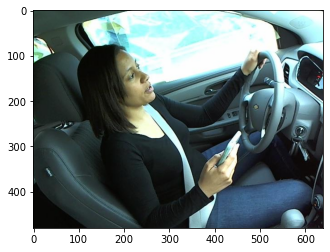

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
data=tf.keras.utils.image_dataset_from_directory('Destruction_data')

Found 11745 files belonging to 2 classes.


In [22]:
directory_path = 'Destruction_data'

In [23]:
class_names = os.listdir(directory_path)

print("Class names:", class_names)

Class names: ['non_phone', 'phone_holding']


In [24]:
data_iterator = data.as_numpy_iterator()
batch=data_iterator.next()
len(batch)

2

In [25]:
batch[0].shape

(32, 256, 256, 3)

In [26]:
batch[1]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

Training face


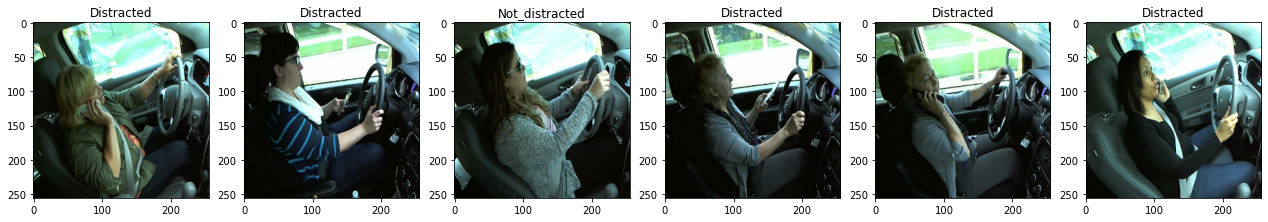

In [27]:
# fig,ax=plt.subplots(ncols=6,figsize=(22,22))
# for idx,img in enumerate(batch[0][:6]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

class_labels = ["Not_distracted", "Distracted"]

fig, ax = plt.subplots(ncols=6, figsize=(22, 22))
print ("Training face")
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    class_index = batch[1][idx]
    class_name = class_labels[class_index]
    ax[idx].set_title(class_name )

plt.show()

In [29]:
scaled=batch[0]/255

In [30]:
scaled.max()

1.0

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [32]:
bath =scaled_iterator.next()[0].max()

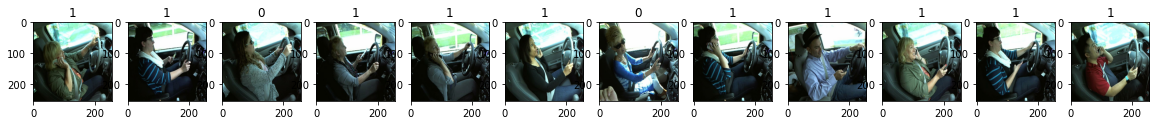

In [33]:
fig,ax=plt.subplots(ncols=12,figsize=(20,20))
for idx,img in enumerate(batch[0][:12]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [34]:
len(data)

368

In [35]:
train_size =int(len(data)*.368)
val_size =int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [37]:
train_size

135

In [38]:
val_size

74

In [39]:
test_size

37

In [40]:
train_size+ val_size+test_size

246

In [41]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test =data.skip(train_size+ val_size).take(test_size)

In [42]:
len(test)

37

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()

In [44]:
model = Sequential()
# # Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# # Add a max-pooling layer after the first convolutional layer
# model.add(MaxPool2D())
# # Add the second convolutional layer
# model.add(Conv2D(32, (3, 3), activation='relu'))
# # Add a max-pooling layer after the second convolutional layer
# model.add(MaxPool2D())
# # Flatten the output from the previous layers
# model.add(Flatten())
# # Add a dense (fully connected) layer with 256 neurons and ReLU activation
# model.add(Dense(256, activation='relu'))
# # Add the output layer with 1 neuron and sigmoid activation for binary classification
# model.add(Dense(1, activation='sigmoid'))

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D())
# model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))         
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())
# Add more dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
# Output layer with 1 unit for binary classification
model.add(Dense(1, activation='sigmoid'))

In [46]:
optimizer = 'adam'
# Compile the model with the correct optimizer
model.compile(optimizer=optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

In [48]:
from keras.applications import VGG16

# Load the VGG-16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')


In [49]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [58]:

pip install graphviz 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from keras.applications import VGG16
from keras.utils.vis_utils import plot_model

# Load the VGG-16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')

# Plot the model architecture and save it to a file
plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
logdir='logs1'
train_labels=class_names

In [55]:
tensorboard_callback =  tf.keras.callbacks.TensorBoard(log_dir=logdir)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [56]:
hist= model.fit(train,epochs=340,validation_data=val,callbacks=[tensorboard_callback])
# # hist= model.fit(train, train_labels, epochs=10, batch_size=32,alidation_data=val,callbacks=[tensorboard_callback])
# hist = model.fit(train, train_labels, epochs=10, batch_size=32)
# # 

Epoch 1/30
135/135 [==============================] - 1132s 8s/step - loss: 33.4446 - accuracy: 0.8604 - val_loss: 0.0920 - val_accuracy: 0.9649
Epoch 2/30
135/135 [==============================] - 1065s 8s/step - loss: 0.0563 - accuracy: 0.9812 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 3/30
135/135 [==============================] - 1043s 8s/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.0258 - val_accuracy: 0.9916
Epoch 4/30
135/135 [==============================] - 893s 7s/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0568 - val_accuracy: 0.9827
Epoch 5/30
135/135 [==============================] - 879s 7s/step - loss: 0.0354 - accuracy: 0.9907 - val_loss: 0.0363 - val_accuracy: 0.9894
Epoch 6/30
135/135 [==============================] - 875s 6s/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.1554 - val_accuracy: 0.9751
Epoch 7/30
135/135 [==============================] - 922s 7s/step - loss: 0.0412 - accuracy: 0.9891 - val_loss: 0.0445 - val_accuracy: 0.

In [58]:
hist.history
import pandas as pd
# Assuming 'hist' is your history object
history_dict = hist.history
# Create a pandas DataFrame from the history data
history_df = pd.DataFrame(history_dict)
# Display the DataFrame
# print(history_df)


from tabulate import tabulate

# Assuming you have created the 'history_df' DataFrame
table = tabulate(history_df, headers='keys', tablefmt='fancy_grid')

print(table)

╒════╤══════════════╤════════════╤════════════╤════════════════╕
│    │         loss │   accuracy │   val_loss │   val_accuracy │
╞════╪══════════════╪════════════╪════════════╪════════════════╡
│  0 │ 33.4446      │   0.860417 │  0.0920334 │       0.964949 │
├────┼──────────────┼────────────┼────────────┼────────────────┤
│  1 │  0.0562992   │   0.98125  │  0.0443818 │       0.986064 │
├────┼──────────────┼────────────┼────────────┼────────────────┤
│  2 │  0.0110466   │   0.99537  │  0.0257668 │       0.991554 │
├────┼──────────────┼────────────┼────────────┼────────────────┤
│  3 │  0.0280375   │   0.990741 │  0.0567948 │       0.982686 │
├────┼──────────────┼────────────┼────────────┼────────────────┤
│  4 │  0.0353883   │   0.990741 │  0.0362838 │       0.989443 │
├────┼──────────────┼────────────┼────────────┼────────────────┤
│  5 │  0.00480169  │   0.998148 │  0.155392  │       0.975084 │
├────┼──────────────┼────────────┼────────────┼────────────────┤
│  6 │  0.0411909   │   0

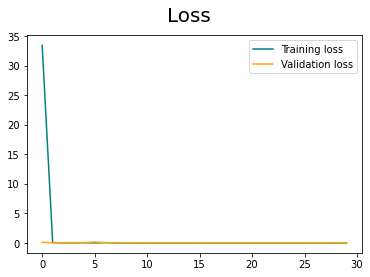

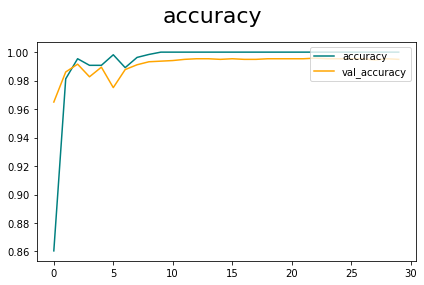

In [115]:
fig = plt.figure()
# Plot the training loss with a teal color and label 'loss'
# Plot the training loss with a teal color and label 'loss'
plt.plot(hist.history['loss'], color='teal', label='Training loss')
# Plot the validation loss with an orange color and label 'val_loss'
plt.plot(hist.history['val_loss'], color='orange', label='Validation loss')
# Set the title of the plot
fig.suptitle('Loss', fontsize=20)
# Add a legend to the plot
plt.legend(loc="upper right")
# Show the plot
plt.show()
fig = plt.figure()
# Plot the training loss with a teal color and label 'loss'
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# Plot the validation loss with an orange color and label 'val_loss'
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
# Set the title of the plot
fig.suptitle('accuracy', fontsize=22)
# Add a legend to the plot
plt.legend(loc="upper right")
plt.tight_layout()
# Show the plot
plt.show()

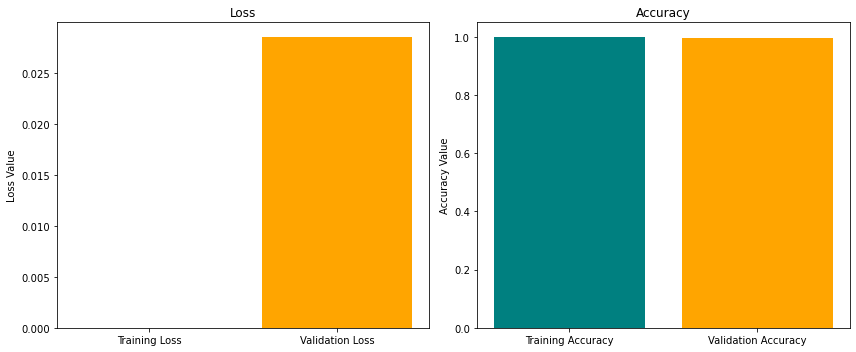

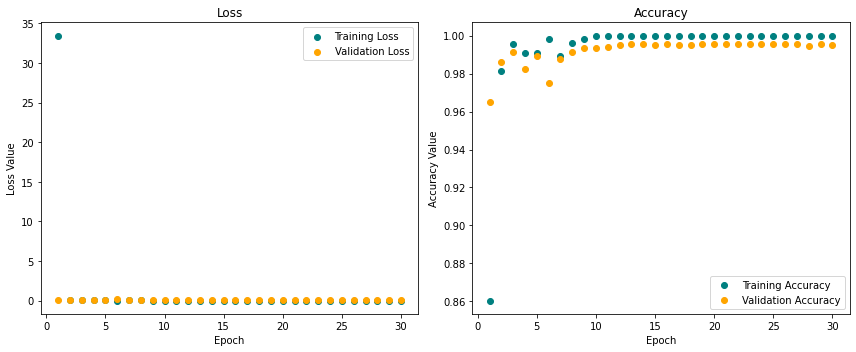

In [146]:
import matplotlib.pyplot as plt

# Create a figure with two subplots, one for loss and one for accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the training and validation loss as a bar graph in the first subplot
ax1.bar(['Training Loss', 'Validation Loss'], [hist.history['loss'][-1], hist.history['val_loss'][-1],], color=['teal', 'orange'])
ax1.set_title('Loss')
ax1.set_ylabel('Loss Value')

# Plot the training and validation accuracy as a bar graph in the second subplot
ax2.bar(['Training Accuracy', 'Validation Accuracy'], [hist.history['accuracy'][-1], hist.history['val_accuracy'][-1]], color=['teal', 'orange'])
ax2.set_title('Accuracy')
ax2.set_ylabel('Accuracy Value')

# Add a little space between the two subplots
plt.tight_layout()

# Show the plots
plt.show()


# Create a figure with two subplots, one for loss and one for accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss as a scatterplot in the first subplot
epochs = range(1, len(hist.history['loss']) + 1)
ax1.scatter(epochs, hist.history['loss'], label='Training Loss', color='teal')
ax1.scatter(epochs, hist.history['val_loss'], label='Validation Loss', color='orange')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss Value')
ax1.legend()

# Plot training and validation accuracy as a scatterplot in the second subplot
ax2.scatter(epochs, hist.history['accuracy'], label='Training Accuracy', color='teal')
ax2.scatter(epochs, hist.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy Value')
ax2.legend()

# Add a little space between the two subplots
plt.tight_layout()

# Show the scatterplots
plt.show()





In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

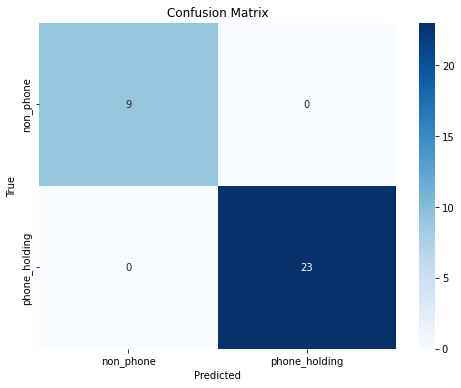

In [147]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['non_phone', 'phone_holding']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred, target_names= ['non_phone', 'phone_holding'], output_dict=True)

# Convert the report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Create a heatmap of the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')

# Display accuracy and confusion matrix separately
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

plt.show()

In [121]:
from sklearn.metrics import classification_report

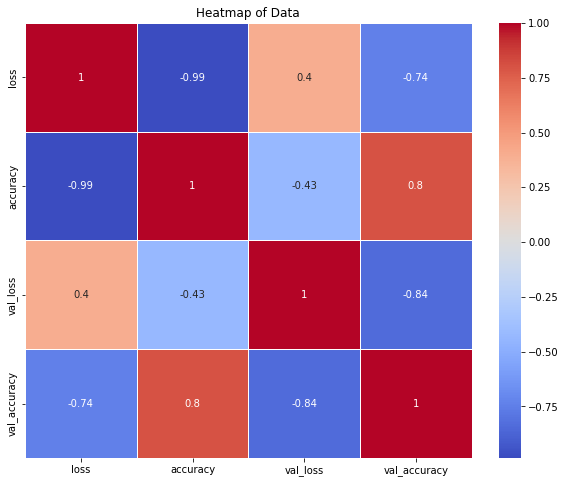

In [122]:
df = pd.DataFrame(hist.history)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Data')
plt.show()

In [102]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [104]:
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [99]:
len(test)

37

In [125]:
for batch in test.as_numpy_iterator():
    x,y =batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 [==============================] - 1s 1s/step


In [149]:
model.save(os.path.join('Driver_distruction_versio_latested.keras'))

In [152]:
from tensorflow.keras.models import load_model

In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [11]:
gpuss = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
for gpu in gpuss:
    tf.config.experimental.set_memory_growth(gpu, True)

In [13]:
model= load_model(os.path.join('Driver_distruction_versio_latested.keras'))

1/1 [==============================] - 0s 201ms/step
Predicted
[[0.5438591]]
1/1 [==============================] - 0s 205ms/step
Predicted
[[0.5438524]]
1/1 [==============================] - 0s 331ms/step
Predicted
[[0.5365924]]
1/1 [==============================] - 0s 348ms/step
Predicted
[[0.53414154]]
1/1 [==============================] - 0s 155ms/step
Predicted
[[0.53611416]]
1/1 [==============================] - 0s 201ms/step
Predicted
[[0.5297166]]
1/1 [==============================] - 0s 168ms/step
Predicted
[[0.53219444]]
1/1 [==============================] - 0s 178ms/step
Predicted
[[0.5405453]]
1/1 [==============================] - 0s 167ms/step
Predicted
[[0.53543305]]
1/1 [==============================] - 0s 172ms/step
Predicted
[[0.5534439]]
1/1 [==============================] - 0s 166ms/step
Predicted
[[0.5534439]]


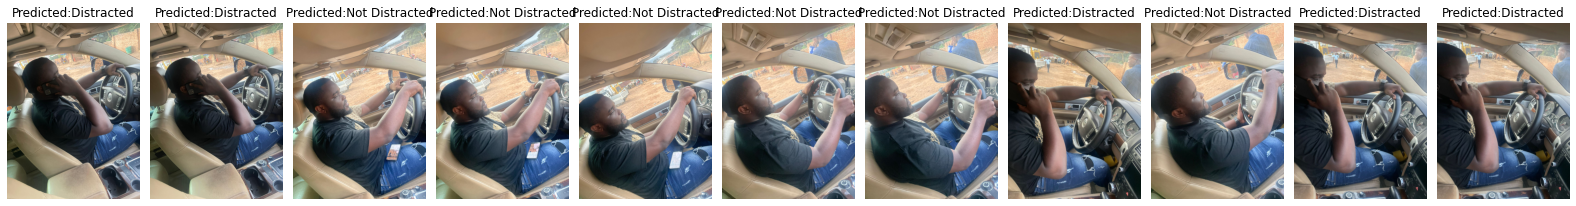

                                           Image File  \
0   WhatsApp Image 2023-10-23 at 18.31.59_19289165...   
1   WhatsApp Image 2023-10-23 at 18.31.59_3c8fee28...   
2   WhatsApp Image 2023-10-23 at 18.32.03_95bbb7f8...   
3   WhatsApp Image 2023-10-23 at 18.32.03_bcf01db2...   
4   WhatsApp Image 2023-10-23 at 18.32.04_8f6d4459...   
5   WhatsApp Image 2023-10-23 at 18.33.03_0a3ba92a...   
6   WhatsApp Image 2023-10-23 at 18.33.03_11a2202f...   
7   WhatsApp Image 2023-10-23 at 18.33.04_41020fa0...   
8   WhatsApp Image 2023-10-23 at 18.33.04_d1d87815...   
9   WhatsApp Image 2023-10-23 at 18.33.05_77a12d6c...   
10  WhatsApp Image 2023-10-23 at 18.33.05_8d2e961d...   

                  Prediction  
0       Predicted:Distracted  
1       Predicted:Distracted  
2   Predicted:Not Distracted  
3   Predicted:Not Distracted  
4   Predicted:Not Distracted  
5   Predicted:Not Distracted  
6   Predicted:Not Distracted  
7       Predicted:Distracted  
8   Predicted:Not Distracted  
9    

In [60]:
# Replace with the path to your image directory
image_directory = 'testin'
results = []
# Create a single figure for all images
fig, axes = plt.subplots(1, len(os.listdir(image_directory)), figsize=(22, 22))
for idx, image_filename in enumerate(os.listdir(image_directory)):
    if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        image_path = os.path.join(image_directory, image_filename)
        frame = cv2.imread(image_path)
        if frame is not None:
            resize = cv2.resize(frame, (256, 256))
            yhat = model.predict(np.expand_dims(resize / 256, 0))
            print("Predicted")
            print(yhat)
            if yhat > 0.54:
                result = "Predicted:Distracted"
            else:
                result = "Predicted:Not Distracted"
            results.append([image_filename, result])
            # Display the image using imshow in the corresponding subplot
            ax = axes[idx]
            ax.axis('off')
            ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            ax.set_title(result)
            ax.set_title(result)
# Ensure proper spacing between subplots
plt.tight_layout()
# Show the figure with all images and predictions
plt.show()
# Create a Pandas DataFrame from the results
df = pd.DataFrame(results, columns=["Image File", "Prediction"])
# Print the DataFrame
print(df)

In [1]:
import cv2
import os
import numpy as np
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the path to your image directory
image_directory = 'testin'
model_path = 'Driver_distruction_versio_latested.keras'

model = load_model(model_path)

results = []

for idx, image_filename in enumerate(os.listdir(image_directory)):
    if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        image_path = os.path.join(image_directory, image_filename)
        frame = cv2.imread(image_path)

        if frame is not None:
            resize = cv2.resize(frame, (256, 256))

            yhat = model.predict(np.expand_dims(resize / 256, 0))
            print("Predicted")
            print(yhat)

            if yhat > 0.6:
                result = "Phone Holding"
            else:
                result = "Not Distracted"

            results.append([image_filename, result])

            # Display the image using imshow in the corresponding subplot
            ax = axes[idx]
            ax.axis('off')
            ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            ax.set_title(result)

# Ensure proper spacing between subplots
plt.tight_layout()

# Show the figure with all images and predictions
plt.show()

# Create a Pandas DataFrame from the results
df = pd.DataFrame(results, columns=["Image File", "Prediction"])

# Print the DataFrame
print(df)



1/1 [==============================] - 1s 777ms/step
Predicted
[[0.5438591]]


NameError: name 'axes' is not defined

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import os

cap = cv2.VideoCapture(0)

model_path = 'Driver_distruction_versio_latested.keras'
model = load_model(model_path)  # Corrected the load_model call
# class_names = ['Sleeping', 'Phone Holding']

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()

    if not ret:
        break  # Exit the loop if frame capture fails

    # Display the frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

    # Resize the frame
    resize = cv2.resize(frame, (256, 256))

    # Assuming you have a 'model' defined elsewhere
    yhat = model.predict(np.expand_dims(resize / 255, 0))
    print("Predicted")
    print(yhat)
    if yhat < 0.54:
        result = "Not Distracted"
    elif yhat >= 0.53:
        result = "Phone Holding"
    else:
        result = "Wonderful Driving"
    print(result)
# Release the camera and close the OpenCV window
cap.release()
cv2.waitKey(1)
plt.close()

In [160]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: jinja2>=2.4 in c:\programdata\anaconda3\lib\site-packages (from nbconvert) (2.11.3)

